# **` 🕵 💳 # CREDIT CARD TRANSACTIONS FRAUD DETECTION  💳 🕵`**

## Problem Statement

Credit card fraud poses a significant risk for both financial organizations and
customers. It is essential to promptly detect fraudulent transactions to prevent financial losses and uphold trust with customers.

The problem of credit card transaction fraud detection involves creating a model based on previous credit card transactions, including those that were determined to be fraudulent. This model is then utilized to determine whether a new transaction is fraudulent or not.

## Objective

The objective of this project is to develop a machine learning model that can accurately identify fraudulent credit card transactions in real-time.

By utilizing historical transaction data and advanced analytics methods, our objective is to decrease both false positives and negatives, leading to a reduction in financial losses caused by fraudulent activities.

## Business Impact

Implementing an effective fraud detection model can have several positive impacts, which I have written as below:

1.   **Cost Savings**: Reducing financial losses associated with fraudulent transactions saves money for both financial sectors and customers.
2.   **Customer Trust**: Prompt detection of fraud enhances customer trust and satisfaction, leading to higher customer retention.
3.  **Operational Efficiency**: Automating fraud detection processes improves operational efficiency and allows resources to focus on critical investigations.
4.  **Compliance**: Meeting regulatory requirements for fraud prevention and reporting enhances the organizational reputation and avoids penalties.

## Information about the Dataset

Credit card fraud detection datasets contain transactional information crucial for developing machine learning models. These datasets typically include features such as transaction amounts, timestamps, merchant details, and customer demographics. By analyzing patterns and anomalies in these datasets, machine learning algorithms can identify fraudulent activities, helping financial institutions prevent financial losses and maintain trust with customers.

1. **Trans_date_trans_time**: This represents the timestamp of a transaction.
2. **cc_num**: It refers to the credit card number used for the transaction.
3. **merchant**: The merchant field contains the name of the business or establishment where the transaction occurred.
4. **category**: This field specifies the type or category of the transaction (e.g., retail, food, e - commerce, travel).
5. **amt**: The transaction amount, denoting the monetary value involved.
6. **first**: The first name of the credit card holder.
7. **Last**: The last name (surname) of the credit card holder.
8. **gender**: Indicates the sex of the cardholder (male, female, or other).
9. **street**: The street address associated with the transaction.
10. **city**: The city where the transaction took place.
11. **state**: The state corresponding to the transaction location.
12. **zip**: The ZIP code or postal code related to the transaction address.
13. **lat**: The latitude coordinate of the transaction location.
14. **long**: The longitude coordinate of the transaction location.
15. **city_pop**: The population of the city where the transaction occurred.
16. **job**: The occupation or job of the credit card holder.
17. **dob**: The date of birth of the cardholder.
18. **trans_num**: The unique transaction number assigned to each transaction.
19. **unix_time**: The time of the transaction represented in Unix format (seconds since January 1, 1970).
20. **merch_lat**: The latitude of the merchant's location.
21. **merch_long**: The longitude of the merchant's location.
22. **is_fraud**: Indicates whether the transaction is fraudulent or not.

### **Imports libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### **Data ingestion**

In [2]:
# importing the fraud Train csv file
Data_train = pd.read_csv(r'E:\DV Analytics Assignments & Study Materials\ML\CC fraud data\fraudTrain.csv')

In [3]:
# importing the fraud Test csv file
Data_test = pd.read_csv(r'E:\DV Analytics Assignments & Study Materials\ML\CC fraud data\fraudTest.csv')

In [4]:
# Appending 2 tables (Train and Test)
x=[Data_train,Data_test]
Demo_Data=pd.concat(x,ignore_index=True)

In [5]:
# It is not possible to create the model by using whole dataset in Jupyter notebook. So, I have only take 30% of the whole data.
# Here I have random_state=42 to sets the random seed for reproducibility.

CCFD_data = Demo_Data.sample(frac=0.3, random_state=42)
CCFD_data.reset_index(drop=True, inplace=True)

# CCFD_data is stands for Credit Card Fraud Detection Data, which will use for for further analysis or processing 

In [6]:
CCFD_data.head() #Extracting first 5 records

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,244469,2020-09-18 07:13:39,5359543825610251,"fraud_Jenkins, Hauck and Friesen",gas_transport,59.91,Michael,Francis,M,1833 Jeanette Stravenue,...,45.7801,-111.1439,18182,"Engineer, drilling",1975-06-29,784eb609215cbaf3725642a7a9f8bb57,1379488419,45.274075,-111.649432,0
1,434906,2020-12-05 17:48:25,5540636818935089,fraud_Jast-McDermott,shopping_pos,3.96,Kenneth,Foster,M,329 Michael Extension,...,42.6911,-71.1605,76383,Geoscientist,1985-04-04,74e0ceb1e273a4a37f56dd2b5e6ce03d,1386265705,43.356278,-71.008959,0
2,354659,2019-06-15 11:24:44,2720894374956739,fraud_Bartoletti-Wunsch,gas_transport,51.17,Audrey,Hickman,F,3325 Gregory Square,...,42.5978,-82.8823,16305,"Psychologist, sport and exercise",1927-05-25,93c2b2ce1e96db464d9a7c7f2e9fb1dd,1339759484,42.372483,-83.508020,0
3,197113,2020-08-29 22:50:25,6011438889172900,"fraud_Roob, Conn and Tremblay",shopping_pos,2.06,Allison,Allen,F,40624 Rebecca Spurs,...,34.2853,-91.3336,5161,Electrical engineer,1993-04-08,a269c6b9d9a1603bee720d3ad4fdcfa8,1377816625,33.833389,-91.158293,0
4,468148,2019-07-25 15:50:35,60495593109,"fraud_Kilback, Nitzsche and Leffler",travel,6.58,Randall,Dillon,M,4440 George Mills Suite 591,...,32.7699,-96.7430,1263321,Television camera operator,1942-11-24,9ce4d94b27e36cc2c79bb02351831722,1343231435,32.458643,-96.577001,0


In [7]:
CCFD_data.tail() #Extracting last 5 records

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555713,269708,2020-09-29 00:29:43,2252055259910912,"fraud_Schumm, Bauch and Ondricka",grocery_pos,91.43,Jason,Hernandez,M,220 Frank Gardens,...,44.6437,-90.1031,828,Arts development officer,1991-08-19,a7b61f2b1a54fc5c8ed913a562e43ab5,1380414583,43.782338,-90.831261,0
555714,147437,2020-08-11 13:03:05,4689147265057948423,"fraud_Medhurst, Cartwright and Ebert",personal_care,9.63,Steven,Brooks,M,2622 Reynolds Isle,...,40.9207,-96.1680,206,Human resources officer,1967-10-04,4b9e1d52d1dc7282d18f57dec1fbfa66,1376226185,41.233033,-96.985836,0
555715,374075,2020-11-14 05:52:10,180046765320457,fraud_Abernathy and Sons,food_dining,85.32,Jared,Camacho,M,4257 Perez Mall,...,40.8027,-81.3739,192805,Building control surveyor,1963-06-30,1d58e17bece2564a0505d6db0e100d70,1384408330,39.935932,-80.801827,0
555716,153028,2019-03-23 14:25:33,4294040533480516,"fraud_Conroy, Balistreri and Gorczany",health_fitness,44.42,Gail,Weaver,F,979 Stewart Lake,...,33.4130,-81.6900,2206,Biomedical scientist,1986-12-31,cc038f0383a3a47611c1b34f35f5285d,1332512733,32.667120,-81.268835,0
555717,121903,2019-03-09 17:47:44,6547670341037171,fraud_Bogisich-Weimann,kids_pets,70.30,Bryce,Joseph,M,148 Baker Field,...,39.8839,-75.4669,348,Management consultant,1945-05-05,603f4988ee478ccaa4e97109262fe9bf,1331315264,38.924503,-75.430423,0


In [8]:
# Drop the column 'Unnamed: 0' as it is not involving role in model building.
CCFD_data.drop(CCFD_data.columns[0], axis=1, inplace=True)

### **Essential information about the data**

In [9]:
## Summary of the dataset
CCFD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555718 entries, 0 to 555717
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555718 non-null  object 
 1   cc_num                 555718 non-null  int64  
 2   merchant               555718 non-null  object 
 3   category               555718 non-null  object 
 4   amt                    555718 non-null  float64
 5   first                  555718 non-null  object 
 6   last                   555718 non-null  object 
 7   gender                 555718 non-null  object 
 8   street                 555718 non-null  object 
 9   city                   555718 non-null  object 
 10  state                  555718 non-null  object 
 11  zip                    555718 non-null  int64  
 12  lat                    555718 non-null  float64
 13  long                   555718 non-null  float64
 14  city_pop               555718 non-nu

In [10]:
# Display the variable formats
CCFD_data.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [11]:
# descriptive summary of the dataset
CCFD_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557180e+05,555718.000000,555718.000000,555718.000000,555718.000000,5.557180e+05,5.557180e+05,555718.000000,555718.000000,555718.000000
mean,4.189016e+17,69.888264,48839.927006,38.537300,-90.238978,8.850884e+04,1.358661e+09,38.536682,-90.239491,0.005287
std,1.311496e+18,159.223964,26872.848009,5.082964,13.768289,3.007594e+05,1.818186e+07,5.117133,13.779563,0.072518
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.027785,-166.671575,0.000000
25%,1.800429e+14,9.650000,26237.000000,34.620500,-96.798000,7.410000e+02,1.343047e+09,34.731153,-96.901955,0.000000
50%,3.521417e+15,47.360000,48174.000000,39.354300,-87.476900,2.435000e+03,1.357046e+09,39.364878,-87.455905,0.000000
75%,4.642255e+15,83.030000,72042.000000,41.940400,-80.175200,2.032800e+04,1.374506e+09,41.953613,-80.262617,0.000000
max,4.992346e+18,27390.120000,99921.000000,66.693300,-67.950300,2.906700e+06,1.388534e+09,67.510267,-66.952352,1.000000


In [12]:
# Checking if it has any Duplicate records
CCFD_data[CCFD_data.duplicated()]  

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


From the above code we have seen that there are no duplicate values are there. And total of 22 columns (fields) are there.

In [13]:
# Missing values in the dataset
CCFD_data.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

There are no null (missing) value are avaiable in the datasets).

In [14]:
# To check number of unique values in each field in the dataset (CCFD_data).
CCFD_data.nunique()

trans_date_trans_time    552722
cc_num                      996
merchant                    693
category                     14
amt                       37817
first                       355
last                        485
gender                        2
street                      996
city                        903
state                        51
zip                         982
lat                         980
long                        980
city_pop                    888
job                         497
dob                         981
trans_num                555718
unix_time                552724
merch_lat                546480
merch_long               551885
is_fraud                      2
dtype: int64

## **Data Exploration** 

### Categorical Variable

A categorical variable, also known as a qualitative variable, is a type of variable that can take on one of a limited, and usually fixed, number of possible values. It assigns each individual or instance to a particular group or nominal category based on some qualitative property

#### **1- merchant**

In [15]:
# Count the frequency of transactions for each merchant in the dataset
CCFD_data['merchant'].value_counts()

fraud_Kilback LLC                        1931
fraud_Cormier LLC                        1603
fraud_Schumm PLC                         1564
fraud_Kuhn LLC                           1538
fraud_Boyer PLC                          1505
                                         ... 
fraud_Little-Gleichner                    323
fraud_Douglas, DuBuque and McKenzie       319
fraud_Ritchie, Bradtke and Stiedemann     317
fraud_Satterfield-Lowe                    302
fraud_Hahn, Douglas and Schowalter        299
Name: merchant, Length: 693, dtype: int64

#### **2- category** 

In [16]:
#Calculate how often each category appears in the dataset based on transaction records.
CCFD_data['category'].value_counts()

gas_transport     56357
grocery_pos       52845
home              52717
shopping_pos      49926
kids_pets         48179
shopping_net      41886
entertainment     40402
food_dining       39250
personal_care     39115
health_fitness    36561
misc_pos          34423
misc_net          27105
grocery_net       19513
travel            17439
Name: category, dtype: int64

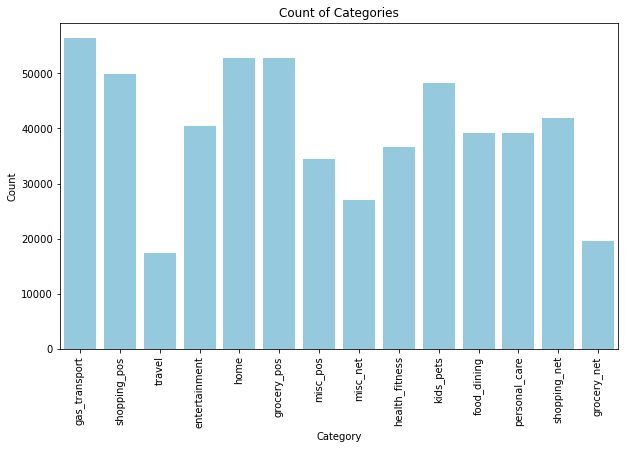

In [17]:
# Make a count plot to verify that each category's frequency level 

plt.figure(figsize=(10, 6)) 
sns.countplot(data=CCFD_data, x='category', color='skyblue')  
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Categories')
plt.xticks(rotation=90) # Rotate x-axis labels

# Show the plot
plt.show()


From the above count plot we observe that most of the transactions are done in gas_transport which is around 55000-60000 times.
Follow to this they have used for home, grocery_pos and so on.


#### **3- first** 

In [18]:
# checking first name column's value count (It's basically explaning us how frequently a person having their first name involving with different credit card transaction).
CCFD_data['first'].value_counts()

Christopher    11314
Robert          9198
Jessica         8717
James           8607
Michael         8584
               ...  
Deanna             2
Traci              2
Phyllis            1
Molly              1
Nicole             1
Name: first, Length: 355, dtype: int64

#### **4- last** 

In [19]:
# checking last name column's value count (It's basically explaning us how frequently a person having theri last name involving with different credit card transaction).
CCFD_data['last'].value_counts()

Smith        12243
Williams      9932
Davis         9337
Johnson       8547
Rodriguez     7544
             ...  
Mathews          2
Bates            2
Strong           2
Freeman          1
Schaefer         1
Name: last, Length: 485, dtype: int64

#### **5- gender** 

In [20]:
# checking the count of the different gender
gender_counts=CCFD_data['gender'].value_counts()
gender_counts

F    304269
M    251449
Name: gender, dtype: int64

In [21]:
# checking what is the percentage distribution of gender in this entire dataset
CCFD_data['gender'].value_counts(normalize = True)

F    0.547524
M    0.452476
Name: gender, dtype: float64

From the above result we conclude that there are 54.7% of the female customers and around 45.2% male customers are present in the entire "CCFD_data" dataset.

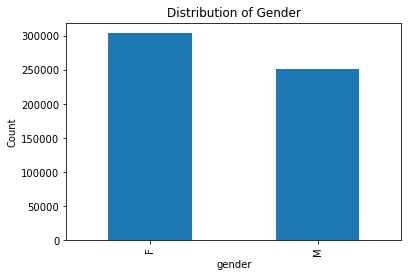

In [22]:
#Visualization - Bar Plot of Gender Counts:

# Plotting the gender counts
gender_counts.plot(kind='bar')
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

#### **6- street**  

In [23]:
# checking the count of the different street
CCFD_data['street'].value_counts()

899 Michele View Suite 960     1385
3531 Hamilton Highway          1363
8030 Beck Motorway             1357
516 Brown Parks                1356
908 Brooks Brook               1356
                               ... 
880 Andrea Greens Suite 241       1
44613 James Turnpike              1
5273 Joseph Isle Suite 518        1
16104 Diane Walk Suite 352        1
537 Brian Island                  1
Name: street, Length: 996, dtype: int64

In [24]:
# Extracting the Unique streets in the dataset
CCFD_data['street'].nunique()

996

From the above result, we can see that there are 996 total number of distinct streets, some of which are repeated and some are only occure once.

#### **7- city**  

In [25]:
# Extracting the Unique city in the dataset
CCFD_data['city'].nunique()

903

In [26]:
# checking the count of the different city
CCFD_data['city'].value_counts()

Birmingham       2340
Phoenix          2261
Utica            2244
San Antonio      2220
Meridian         2154
                 ... 
Gaines              1
Pleasant Hill       1
Norfolk             1
Wappapello          1
Rice                1
Name: city, Length: 903, dtype: int64

From the above result, we noticed that it's just like there are 903 total number of distinct city, some of which are repeated and some are only occure once.

#### **8- state**  

'state' column is quite similer to city and street column according to the analysis point of view because it's describe the adress of the customers. 

In [27]:
# Extracting the Unique state in the dataset
CCFD_data['state'].nunique()

51

In [28]:
# checking the count of the different state
CCFD_data['state'].value_counts()

TX    40574
NY    35539
PA    34403
CA    24146
OH    19909
MI    19895
IL    18670
FL    18355
AL    17408
MO    16501
MN    13636
AR    13392
NC    12864
WI    12605
SC    12597
VA    12582
KY    12369
IN    11686
IA    11564
OK    11518
GA    11222
WV    11035
MD    11029
NE    10378
NJ    10370
KS     9928
MS     9092
LA     9049
WY     8243
WA     8069
OR     7939
TN     7385
ME     7095
NM     7001
ND     6302
CO     5893
SD     5356
MA     5242
VT     5059
MT     5052
AZ     4712
UT     4569
NH     3510
CT     3335
NV     2446
ID     2338
DC     1582
HI     1110
AK      943
RI      218
DE        3
Name: state, dtype: int64

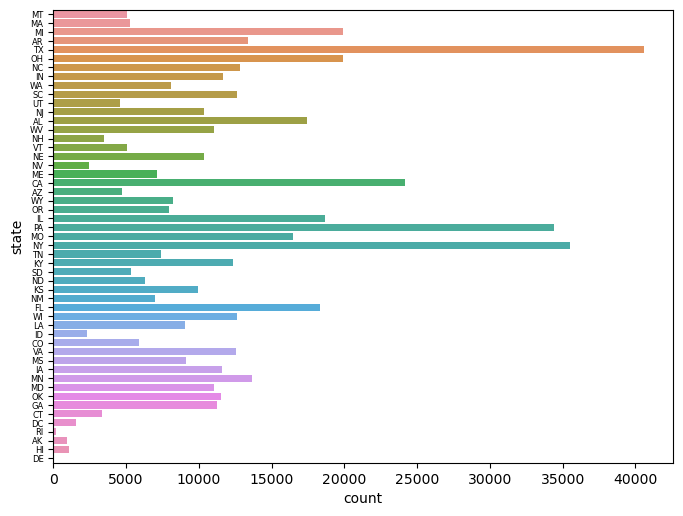

In [29]:
# Visualizing the count of occurrences of each state in the dataset using a countplot
plt.figure(figsize=(8, 6), dpi=100)
sns.countplot(y="state", data=CCFD_data)
plt.yticks(fontsize=6)  # Adjust the font size
plt.show()

#### **9- zip**  

In [30]:
# Extracting the Unique zip in the dataset
CCFD_data['zip'].nunique()

982

In [31]:
# checking the count of the different zip
CCFD_data['zip'].value_counts()

73754    1594
48088    1567
34112    1534
82514    1497
19149    1385
         ... 
73044       1
56367       1
28033       1
75246       1
63966       1
Name: zip, Length: 982, dtype: int64

According to the result, the state column is quite comparable to the city, state and street columns because it describes the consumers' addresses.

#### **10- job** 

In [32]:
# Extracting the Unique job in the dataset
CCFD_data['job'].nunique()

497

In [33]:
# checking the count of the different job
CCFD_data['job'].value_counts()

Film/video editor                 4140
Exhibition designer               3907
Naval architect                   3706
Surveyor, land/geomatics          3687
Designer, ceramics/pottery        3557
                                  ... 
Information officer                  1
Ship broker                          1
Armed forces technical officer       1
Veterinary surgeon                   1
Broadcast journalist                 1
Name: job, Length: 497, dtype: int64

job is the another field which contain 497 which around 500 different job type's people.

#### **11- dob** 

In [34]:
# checking the count of the different dob
CCFD_data['dob'].value_counts()

1977-03-23    2451
1988-09-15    1942
1981-08-29    1910
1955-05-06    1486
1985-01-01    1385
              ... 
1969-11-08       1
1949-04-28       1
1956-03-20       1
1963-02-20       1
1946-05-28       1
Name: dob, Length: 981, dtype: int64

'dob' basically stands for Date of birth of the customers. From the above counts code we noticed that some customers have same date of birth.

#### **12- is_fraud** 

In [35]:
# checking the count of the different fraud customers
fraud_counts=CCFD_data['is_fraud'].value_counts()
fraud_counts

0    552780
1      2938
Name: is_fraud, dtype: int64

That means there are total 553580 transactions are normal and 2938 transactions are fraudelent.

In [36]:
# checking what is the percentage distribution of fraud customer in this entire dataset
fraud_counts_percent=CCFD_data['is_fraud'].value_counts(normalize = True)
fraud_counts_percent

0    0.994713
1    0.005287
Name: is_fraud, dtype: float64

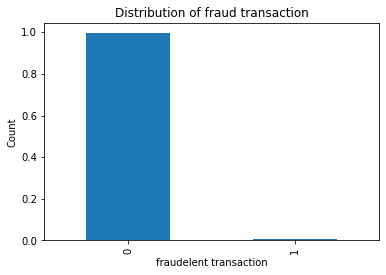

In [37]:
#Visualization - Bar Plot of fraud Counts:

# Plotting the fraud counts
fraud_counts_percent.plot(kind='bar')
plt.xlabel('fraudelent transaction')
plt.ylabel('Count')
plt.title('Distribution of fraud transaction')
plt.show()

### Continuous Variable

#### **1- cc_num** 

In [38]:
#Extracting some sample Credit card number from the dataset
CCFD_data['cc_num'].head()

0    5359543825610251
1    5540636818935089
2    2720894374956739
3    6011438889172900
4         60495593109
Name: cc_num, dtype: int64

In [39]:
#counts of different Crecit card at the time of transaction
CCFD_data['cc_num'].value_counts()

3583635130604947       1385
4939976756738216       1363
3545109339866548       1357
30270432095985         1356
4836998673805450       1356
                       ... 
3554421171166228          1
38817501916673            1
4243521033756702612       1
6011732631674654          1
6011935564104173          1
Name: cc_num, Length: 996, dtype: int64

Here, we are taking CC_num (credit card number) as a continuous variable, but it is not necessary because it merely defines the card number.

#### **2- amt**  

In [40]:
#Extracting some sample amount from the dataset
CCFD_data['amt'].head()

0    59.91
1     3.96
2    51.17
3     2.06
4     6.58
Name: amt, dtype: float64

In [41]:
#counts of different amount of transaction
CCFD_data['amt'].value_counts()

1.04      240
1.35      232
1.11      231
1.20      227
1.25      227
         ... 
560.45      1
333.35      1
298.52      1
390.64      1
357.27      1
Name: amt, Length: 37817, dtype: int64

In [42]:
# Mean of amount of transaction
round(CCFD_data['amt'].mean())

70

From the above code we can get that around \$70 amount has been used for credit card transaction by single customer.

#### **3- lat** 

In [43]:
#Extracting some sample latitude from the dataset
CCFD_data['lat'].head()

0    45.7801
1    42.6911
2    42.5978
3    34.2853
4    32.7699
Name: lat, dtype: float64

In [44]:
#counts of different latitude of transaction
CCFD_data['lat'].value_counts()

36.3850    1594
42.5164    1567
26.1184    1534
43.0048    1497
40.0369    1385
           ... 
41.1165       1
41.0022       1
41.2123       1
32.7948       1
45.7364       1
Name: lat, Length: 980, dtype: int64

Here 'lat' is stands for latitude and according to the above result some transaction have been done in the same latitude location.

#### **4- long**

In [45]:
#Extracting some sample longitude from the dataset
CCFD_data['long'].head()

0   -111.1439
1    -71.1605
2    -82.8823
3    -91.3336
4    -96.7430
Name: long, dtype: float64

In [46]:
#counts of different Longitude of transaction
CCFD_data['long'].value_counts()

-98.0727     1594
-82.9832     1567
-81.7361     1534
-108.8964    1497
-75.0664     1385
             ... 
-83.8855        1
-90.2848        1
-96.7697        1
-97.4360        1
-79.3773        1
Name: long, Length: 980, dtype: int64

Here 'long' is stands for longitude and according to the above result some transaction happen in same longitude location. And this is just simillar as longitude.

#### **5- city_pop**

In [47]:
#Extracting some sample city population from the dataset
CCFD_data['city_pop'].head()

0      18182
1      76383
2      16305
3       5161
4    1263321
Name: city_pop, dtype: int64

In [48]:
#counts of different city population of transaction
CCFD_data['city_pop'].value_counts()

606        2405
1312922    2261
1595797    2220
1766       1977
241        1929
           ... 
20226         1
242803        1
10127         1
6263          1
3764          1
Name: city_pop, Length: 888, dtype: int64

In [49]:
# calculating the mean of population from the entire dataset
round(CCFD_data['city_pop'].mean())

88509

City population represents what number of people lives in a particular city, and according to the mean formula we get that a average of 88509 number of people lives in a particular city.

#### **6- merch_lat**

In [50]:
#Extracting the sample latitude location of the merchent
CCFD_data['merch_lat'].head()

0    45.274075
1    43.356278
2    42.372483
3    33.833389
4    32.458643
Name: merch_lat, dtype: float64

In [51]:
#Extracting the sample longitude location of the merchent
CCFD_data['merch_long'].head()

0   -111.649432
1    -71.008959
2    -83.508020
3    -91.158293
4    -96.577001
Name: merch_long, dtype: float64

This one is quite similler to the latitude and longitude which is discussed above but only difference is that merch_lat and merch_long are representing the latitude and longtitude of the merchent's location where the simple latitude and longitude are representing the location where the transaction happend.

## **Data Preparation & Data Cleaning** 

**Based on the variables listed above, we may conclude that some of the fields are not essential for developing a credit card fraud detection model.
And the fileds are first, last,city, zip and street. Just explained below why we don't need them as of now.**

* **Customers' first and last names are not unique because in the above determination we find that the first and last name having redundant values, but their cc_num has unique records. So, We can utilise the cc_num to distinguish between customers and remove the first and last names as they are no longer useful.**
* **As we need address for the moment and state contains both city and zip code, and street comes under city, we may move with the state column and drop street, city, and zip.**

In [52]:
CCFD_data = CCFD_data.drop(columns = ["first","last", "city","zip","street"])
CCFD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555718 entries, 0 to 555717
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555718 non-null  object 
 1   cc_num                 555718 non-null  int64  
 2   merchant               555718 non-null  object 
 3   category               555718 non-null  object 
 4   amt                    555718 non-null  float64
 5   gender                 555718 non-null  object 
 6   state                  555718 non-null  object 
 7   lat                    555718 non-null  float64
 8   long                   555718 non-null  float64
 9   city_pop               555718 non-null  int64  
 10  job                    555718 non-null  object 
 11  dob                    555718 non-null  object 
 12  trans_num              555718 non-null  object 
 13  unix_time              555718 non-null  int64  
 14  merch_lat              555718 non-nu

 **The 'dob' column simply tells us the date of birth of the specific customer, which is unnecessary for the model, while the 'age' can play a important role for model development. So, I'm adding a new column called 'age' by subtracting dob from today's date.**

In [53]:
import datetime as dt
CCFD_data['age']=dt.date.today().year-pd.to_datetime(CCFD_data['dob']).dt.year
CCFD_data['age']

0         49
1         39
2         97
3         31
4         82
          ..
555713    33
555714    57
555715    61
555716    38
555717    79
Name: age, Length: 555718, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Density'>

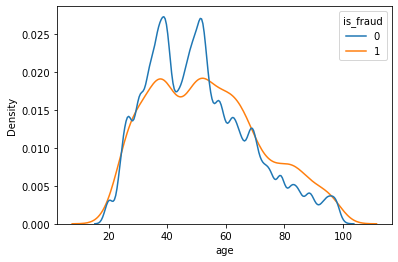

In [54]:
sns.kdeplot(data=CCFD_data,x='age',hue='is_fraud',common_norm=False)

**'trans_date_trans_time' contain both transaction date and time. let's spilt them into date and time so that the it will help us in future.**

In [55]:
# Splitting date and time
CCFD_data['trans_date'] = CCFD_data['trans_date_trans_time'].str.split(' ').str[0]
CCFD_data['trans_time'] = CCFD_data['trans_date_trans_time'].str.split(' ').str[1]

In [56]:
CCFD_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,state,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,trans_date,trans_time
0,2020-09-18 07:13:39,5359543825610251,"fraud_Jenkins, Hauck and Friesen",gas_transport,59.91,M,MT,45.7801,-111.1439,18182,"Engineer, drilling",1975-06-29,784eb609215cbaf3725642a7a9f8bb57,1379488419,45.274075,-111.649432,0,49,2020-09-18,07:13:39
1,2020-12-05 17:48:25,5540636818935089,fraud_Jast-McDermott,shopping_pos,3.96,M,MA,42.6911,-71.1605,76383,Geoscientist,1985-04-04,74e0ceb1e273a4a37f56dd2b5e6ce03d,1386265705,43.356278,-71.008959,0,39,2020-12-05,17:48:25
2,2019-06-15 11:24:44,2720894374956739,fraud_Bartoletti-Wunsch,gas_transport,51.17,F,MI,42.5978,-82.8823,16305,"Psychologist, sport and exercise",1927-05-25,93c2b2ce1e96db464d9a7c7f2e9fb1dd,1339759484,42.372483,-83.508020,0,97,2019-06-15,11:24:44
3,2020-08-29 22:50:25,6011438889172900,"fraud_Roob, Conn and Tremblay",shopping_pos,2.06,F,AR,34.2853,-91.3336,5161,Electrical engineer,1993-04-08,a269c6b9d9a1603bee720d3ad4fdcfa8,1377816625,33.833389,-91.158293,0,31,2020-08-29,22:50:25
4,2019-07-25 15:50:35,60495593109,"fraud_Kilback, Nitzsche and Leffler",travel,6.58,M,TX,32.7699,-96.7430,1263321,Television camera operator,1942-11-24,9ce4d94b27e36cc2c79bb02351831722,1343231435,32.458643,-96.577001,0,82,2019-07-25,15:50:35


Let's Extract trans_hours from the trans_time and trans_day, trans_year and trans_months from the trans_date.

In [57]:
# Convert 'trans_time' to datetime format
CCFD_data['trans_time'] = pd.to_datetime(CCFD_data['trans_time'], format='%H:%M:%S')

# Extract the hours
# Extract the hours from trans_time colum
CCFD_data['trans_hour'] = CCFD_data['trans_time'].dt.hour
CCFD_data['trans_hour']

0          7
1         17
2         11
3         22
4         15
          ..
555713     0
555714    13
555715     5
555716    14
555717    17
Name: trans_hour, Length: 555718, dtype: int64

<AxesSubplot:xlabel='trans_hour', ylabel='count'>

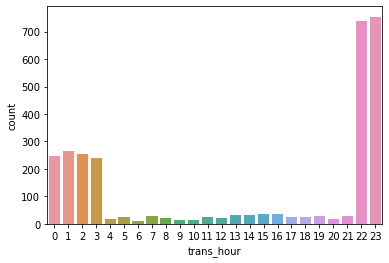

In [58]:
#Plotting fraud transactions with respect to the hour of day
sns.countplot(x="trans_hour",data=CCFD_data[CCFD_data["is_fraud"]==1])

According to the data above, the majority of fraud transactions occurred during the hours of midnight.

In [59]:
# Convert "trans_date" to datetime format
CCFD_data['trans_date'] = pd.to_datetime(CCFD_data['trans_date'])

# Extract day, month, and year into separate columns
CCFD_data['trans_day'] = CCFD_data['trans_date'].dt.day
CCFD_data['trans_month'] = CCFD_data['trans_date'].dt.month
CCFD_data['trans_year'] = CCFD_data['trans_date'].dt.year


<AxesSubplot:xlabel='trans_day', ylabel='count'>

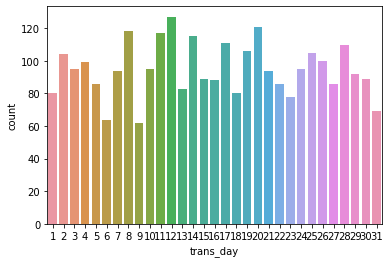

In [60]:
#Plotting fraud transactions with respect to the day
sns.countplot(x="trans_day",data=CCFD_data[CCFD_data["is_fraud"]==1])

As we can see, the transaction is not partial on any day of the month; it's distributed equally.

<AxesSubplot:xlabel='trans_month', ylabel='count'>

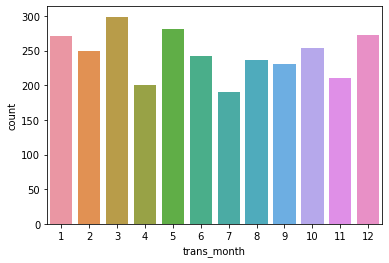

In [61]:
#Plotting fraud transactions with respect to the transaction month
sns.countplot(x="trans_month",data=CCFD_data[CCFD_data["is_fraud"]==1])

this plotted result also same as the transaction day, the transaction is not partial on of the month; it's distributed equally.

<AxesSubplot:xlabel='trans_year', ylabel='count'>

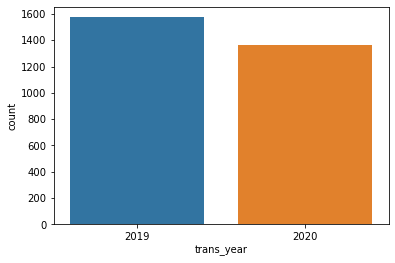

In [62]:
#Plotting fraud transactions with respect to the transaction year
sns.countplot(x="trans_year",data=CCFD_data[CCFD_data["is_fraud"]==1])

There are more Fraud transactions are done on 2019 which nearly about 1600. And around 1400 fraud transactions are done on  year 2020.

**We noticed that 'geneder' column contains two value one is male and another is female, so we just assigned all the male as 1 and all the female as 0 to make the dataset impactfull.**

In [63]:
CCFD_data['gender']=CCFD_data['gender'].apply(lambda x: 1 if x=="M" else 0)
CCFD_data['gender'].value_counts()

0    304269
1    251449
Name: gender, dtype: int64

**In the dataset, they haven specified latitude and longitude where the transaction has been done and the merchant's latitude and longitude, however we can use these things to calculate the distance between the transaction's location and the merchant's position.**

In [64]:
CCFD_data["lat_diff"] = abs(CCFD_data['lat'] - CCFD_data['merch_lat'])
CCFD_data["long_diff"] = abs(CCFD_data["long"] - CCFD_data["merch_long"])

In [65]:
# So ,now  we have the difference i.e. lat_diff & long_diff ,As we know that difference between each degree of longitude and lattitude is 69 miles(approx) i.e 110 Kilometers.
# So taking displacement into account as it will be difficult to calculate distance between merchant's location
# or customer's location so applying pythogoras theorem

CCFD_data["displacement"] = np.sqrt(pow((CCFD_data["lat_diff"]*110),2) + pow((CCFD_data["long_diff"]*110),2))

# here we have applied pythogoras theorem and we have multiplied with 110 because each degree of longitude and lattitude is 69 miles(approx).

CCFD_data["displacement"] = round(CCFD_data["displacement"], 2)  # Round the value upto two decimal place

CCFD_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,state,lat,long,city_pop,...,age,trans_date,trans_time,trans_hour,trans_day,trans_month,trans_year,lat_diff,long_diff,displacement
0,2020-09-18 07:13:39,5359543825610251,"fraud_Jenkins, Hauck and Friesen",gas_transport,59.91,1,MT,45.7801,-111.1439,18182,...,49,2020-09-18,1900-01-01 07:13:39,7,18,9,2020,0.506025,0.505532,78.68
1,2020-12-05 17:48:25,5540636818935089,fraud_Jast-McDermott,shopping_pos,3.96,1,MA,42.6911,-71.1605,76383,...,39,2020-12-05,1900-01-01 17:48:25,17,5,12,2020,0.665178,0.151541,75.04
2,2019-06-15 11:24:44,2720894374956739,fraud_Bartoletti-Wunsch,gas_transport,51.17,0,MI,42.5978,-82.8823,16305,...,97,2019-06-15,1900-01-01 11:24:44,11,15,6,2019,0.225317,0.625720,73.16
3,2020-08-29 22:50:25,6011438889172900,"fraud_Roob, Conn and Tremblay",shopping_pos,2.06,0,AR,34.2853,-91.3336,5161,...,31,2020-08-29,1900-01-01 22:50:25,22,29,8,2020,0.451911,0.175307,53.32
4,2019-07-25 15:50:35,60495593109,"fraud_Kilback, Nitzsche and Leffler",travel,6.58,1,TX,32.7699,-96.7430,1263321,...,82,2019-07-25,1900-01-01 15:50:35,15,25,7,2019,0.311257,0.165999,38.80


**After considering the above calculation we noticed that there is no requirement of columns like 'dob', 'transaction_date_time', 'lat', 'long', 'merch_lat', and 'merch_long','lat_diff' and 'long_diff' as of now. So, we can remove these columns.**

In [66]:
CCFD_data = CCFD_data.drop(columns = ["dob","lat", "long","trans_date_trans_time","merch_lat","merch_long","lat_diff","long_diff"])
CCFD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555718 entries, 0 to 555717
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   cc_num        555718 non-null  int64         
 1   merchant      555718 non-null  object        
 2   category      555718 non-null  object        
 3   amt           555718 non-null  float64       
 4   gender        555718 non-null  int64         
 5   state         555718 non-null  object        
 6   city_pop      555718 non-null  int64         
 7   job           555718 non-null  object        
 8   trans_num     555718 non-null  object        
 9   unix_time     555718 non-null  int64         
 10  is_fraud      555718 non-null  int64         
 11  age           555718 non-null  int64         
 12  trans_date    555718 non-null  datetime64[ns]
 13  trans_time    555718 non-null  datetime64[ns]
 14  trans_hour    555718 non-null  int64         
 15  trans_day     555

### DATA Encoding

In [67]:
CCFD_data[['cc_num','merchant','category','state','job']].nunique()

cc_num      996
merchant    693
category     14
state        51
job         497
dtype: int64

**We can't apply nominal or lebal encoding because the number of categories is significantly bigger, so for that region, let's use frequency encoding.**

In [68]:
# Frequency Encoding
for col in ['cc_num','merchant','category','state','job']:
    freq = CCFD_data[col].value_counts()
    CCFD_data[col + '_freq'] = CCFD_data[col].map(freq)

In [69]:
CCFD_data.head()

,cc_num,merchant,category,amt,gender,state,city_pop,job,trans_num,unix_time,...,trans_hour,trans_day,trans_month,trans_year,displacement,cc_num_freq,merchant_freq,category_freq,state_freq,job_freq
0,5359543825610251,"fraud_Jenkins, Hauck and Friesen",gas_transport,59.91,1,MT,18182,"Engineer, drilling",784eb609215cbaf3725642a7a9f8bb57,1379488419,...,7,18,9,2020,78.68,872,1171,56357,5052,872
1,5540636818935089,fraud_Jast-McDermott,shopping_pos,3.96,1,MA,76383,Geoscientist,74e0ceb1e273a4a37f56dd2b5e6ce03d,1386265705,...,17,5,12,2020,75.04,1058,987,49926,5242,2361
2,2720894374956739,fraud_Bartoletti-Wunsch,gas_transport,51.17,0,MI,16305,"Psychologist, sport and exercise",93c2b2ce1e96db464d9a7c7f2e9fb1dd,1339759484,...,11,15,6,2019,73.16,429,1147,56357,19895,842
3,6011438889172900,"fraud_Roob, Conn and Tremblay",shopping_pos,2.06,0,AR,5161,Electrical engineer,a269c6b9d9a1603bee720d3ad4fdcfa8,1377816625,...,22,29,8,2020,53.32,1264,1006,49926,13392,2212
4,60495593109,"fraud_Kilback, Nitzsche and Leffler",travel,6.58,1,TX,1263321,Television camera operator,9ce4d94b27e36cc2c79bb02351831722,1343231435,...,15,25,7,2019,38.80,218,357,17439,40574,218


As I have already encoded the non-numerical column to numerical column, so let's drop the non-numeric column and also drop the 'transaction_num','trans_date','trans_time' & unix_time column also as it's not important.

In [70]:
CCFD_data = CCFD_data.drop(columns = ['cc_num','merchant','category','state','job','trans_num','unix_time','trans_date','trans_time'])
CCFD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555718 entries, 0 to 555717
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   amt            555718 non-null  float64
 1   gender         555718 non-null  int64  
 2   city_pop       555718 non-null  int64  
 3   is_fraud       555718 non-null  int64  
 4   age            555718 non-null  int64  
 5   trans_hour     555718 non-null  int64  
 6   trans_day      555718 non-null  int64  
 7   trans_month    555718 non-null  int64  
 8   trans_year     555718 non-null  int64  
 9   displacement   555718 non-null  float64
 10  cc_num_freq    555718 non-null  int64  
 11  merchant_freq  555718 non-null  int64  
 12  category_freq  555718 non-null  int64  
 13  state_freq     555718 non-null  int64  
 14  job_freq       555718 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 63.6 MB


###### Checking outliers and utilising imputational techniques.

In [71]:
# amt

CCFD_data['amt'].describe() #Summary of the 'amt' column

count    555718.000000
mean         69.888264
std         159.223964
min           1.000000
25%           9.650000
50%          47.360000
75%          83.030000
max       27390.120000
Name: amt, dtype: float64

In [72]:
util_percentiles=CCFD_data['amt'].quantile([0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.995,1.00])
round(util_percentiles,2)

0.100        4.11
0.250        9.65
0.500       47.36
0.750       83.03
0.800       94.52
0.900      136.27
0.910      143.18
0.920      152.10
0.930      164.10
0.940      179.45
0.950      195.05
0.960      212.67
0.970      244.54
0.980      330.52
0.990      536.54
0.995      826.71
1.000    27390.12
Name: amt, dtype: float64

From the above result we see that around 99.5% values are below 1000$ and around 0.05% value contains much higher value which can be containe as outliers let's take 1000 as our threshold point.

In [73]:
# High-side outliers percentage
high_outliers_amount = CCFD_data[CCFD_data['amt'] >1000].shape[0]
high_outliers_amount = high_outliers_amount / len(CCFD_data) * 100
f"{high_outliers_amount:.2f}%"

'0.29%'

From the above code we clearly see that around 0.3% are higher outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x1b856a019d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b856abe0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b856a01670>],
 'medians': [<matplotlib.lines.Line2D at 0x1b856abe790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b856abeaf0>],
 'means': []}

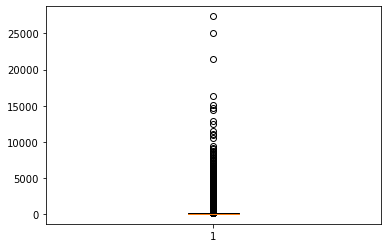

In [74]:
plt.boxplot(CCFD_data['amt']) # plot the box plot to visualize the outliers

In [75]:
(CCFD_data['amt']>1000).sum()

1636

In [76]:
(CCFD_data['amt']<1000).sum()

554081

We see that most of the data that is 554081 entries are below 1000$ and only 1636 is above 1000 so we can treat them as outliers. 1636 is less than 10% of the data . So , We can change them with median.

In [77]:
#Remove amount above then 1000 with median amount value.
CCFD_data['amt_new']=CCFD_data['amt']
CCFD_data['amt_new'][CCFD_data['amt']>1000]=CCFD_data['amt'].median()
round(CCFD_data['amt_new'].describe())

<ipython-input-77-0d1bab59c3b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CCFD_data['amt_new'][CCFD_data['amt']>1000]=CCFD_data['amt'].median()


count    555718.0
mean         65.0
std          87.0
min           1.0
25%          10.0
50%          47.0
75%          82.0
max        1000.0
Name: amt_new, dtype: float64

In [78]:
# Checking whether any outliers present after the imputation or not
util_percentiles_new=CCFD_data['amt_new'].quantile([0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.995,1.00])
round(util_percentiles_new,2)

0.100       4.11
0.250       9.65
0.500      47.36
0.750      82.47
0.800      93.74
0.900     134.40
0.910     140.97
0.920     149.17
0.930     160.14
0.940     174.62
0.950     190.51
0.960     206.86
0.970     231.33
0.980     297.07
0.990     474.12
0.995     609.40
1.000    1000.00
Name: amt_new, dtype: float64

With the above result we conclude that there is no outlier now.

In [79]:
# As we have the new amt column is there so dropping the old amt column

CCFD_data = CCFD_data.drop(columns = ['amt'])
CCFD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555718 entries, 0 to 555717
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gender         555718 non-null  int64  
 1   city_pop       555718 non-null  int64  
 2   is_fraud       555718 non-null  int64  
 3   age            555718 non-null  int64  
 4   trans_hour     555718 non-null  int64  
 5   trans_day      555718 non-null  int64  
 6   trans_month    555718 non-null  int64  
 7   trans_year     555718 non-null  int64  
 8   displacement   555718 non-null  float64
 9   cc_num_freq    555718 non-null  int64  
 10  merchant_freq  555718 non-null  int64  
 11  category_freq  555718 non-null  int64  
 12  state_freq     555718 non-null  int64  
 13  job_freq       555718 non-null  int64  
 14  amt_new        555718 non-null  float64
dtypes: float64(2), int64(13)
memory usage: 63.6 MB


In [80]:
# city_pop

util_percentiles_population=CCFD_data['city_pop'].quantile([0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.995,1.00])
util_percentiles_population

0.100        260.0
0.250        741.0
0.500       2435.0
0.750      20328.0
0.800      42384.0
0.900     186140.0
0.910     214703.0
0.920     248858.0
0.930     320420.0
0.940     391389.0
0.950     525713.0
0.960     687276.0
0.970     910148.0
0.980    1263321.0
0.990    1577385.0
0.995    2383912.0
1.000    2906700.0
Name: city_pop, dtype: float64

According to the internet, a city's population cannot be fewer than 1500 or more than 1000,000. That is why I have chosen 1500 and 1000000 as my threshold points.

{'whiskers': [<matplotlib.lines.Line2D at 0x1b857526d00>,
 'caps': [<matplotlib.lines.Line2D at 0x1b8575fe400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b8575269a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b8575feac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b8575fee20>],
 'means': []}

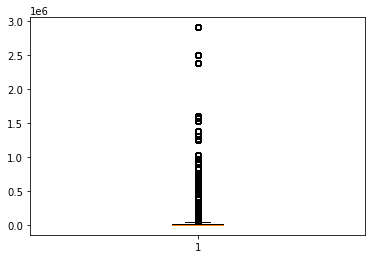

In [81]:
plt.boxplot(CCFD_data['city_pop']) # plot the box plot to visualize the outliers

In [82]:
# low-side outliers percentage
low_outliers_city_population = CCFD_data[CCFD_data['city_pop'] < 1500].shape[0]
low_outliers_city_population = low_outliers_city_population / len(CCFD_data) * 100
f"{low_outliers_city_population:.2f}%"

'38.18%'

In [83]:
# High-side outliers percentage
low_outliers_city_population = CCFD_data[CCFD_data['city_pop'] >1000000].shape[0]
low_outliers_city_population = low_outliers_city_population / len(CCFD_data) * 100
f"{low_outliers_city_population:.2f}%"

'2.54%'

The above calculation revealed that roughly 41% of the data is outliers. So to get rid of that, let's remove those outliers with the median value. 

In [84]:
# Replacing the outliers with median value

CCFD_data['city_pop_new'] = CCFD_data['city_pop']
CCFD_data['city_pop_new'][(CCFD_data['city_pop'] > 1000000) | (CCFD_data['city_pop'] < 1500)] = round(CCFD_data['city_pop'].median())
CCFD_data['city_pop_new']

<ipython-input-84-75cb313ddcca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CCFD_data['city_pop_new'][(CCFD_data['city_pop'] > 1000000) | (CCFD_data['city_pop'] < 1500)] = round(CCFD_data['city_pop'].median())


0          18182
1          76383
2          16305
3           5161
4           2435
           ...  
555713      2435
555714      2435
555715    192805
555716      2206
555717      2435
Name: city_pop_new, Length: 555718, dtype: int64

In [85]:
# percentile distribution for new variable
CCFD_data['city_pop_new'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
 #Here we can see that there is no outlers

0.050      1789.0
0.100      2290.0
0.250      2435.0
0.500      2435.0
0.750     14871.0
0.800     28425.0
0.900    124967.0
0.910    144160.0
0.950    276002.0
0.960    341043.0
0.970    413574.0
0.975    518429.0
0.980    601723.0
0.990    753116.0
1.000    973849.0
Name: city_pop_new, dtype: float64

In [86]:
# As we have the new variable for city population so we don't need the old one(city_pop), So, I am deleting now
CCFD_data.drop(columns=["city_pop"], axis=1, inplace=True)
CCFD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555718 entries, 0 to 555717
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gender         555718 non-null  int64  
 1   is_fraud       555718 non-null  int64  
 2   age            555718 non-null  int64  
 3   trans_hour     555718 non-null  int64  
 4   trans_day      555718 non-null  int64  
 5   trans_month    555718 non-null  int64  
 6   trans_year     555718 non-null  int64  
 7   displacement   555718 non-null  float64
 8   cc_num_freq    555718 non-null  int64  
 9   merchant_freq  555718 non-null  int64  
 10  category_freq  555718 non-null  int64  
 11  state_freq     555718 non-null  int64  
 12  job_freq       555718 non-null  int64  
 13  amt_new        555718 non-null  float64
 14  city_pop_new   555718 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 63.6 MB


In [87]:
# age
# Here "age" is a predictor variable.

util_percentiles_age=CCFD_data['age'].quantile([0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.995,1.00])
util_percentiles_age  #distribution of age in different percentage

0.100     30.0
0.250     37.0
0.500     49.0
0.750     62.0
0.800     65.0
0.900     75.0
0.910     77.0
0.920     79.0
0.930     80.0
0.940     83.0
0.950     85.0
0.960     87.0
0.970     89.0
0.980     93.0
0.990     96.0
0.995     98.0
1.000    100.0
Name: age, dtype: float64

(array([ 39183.,  73968., 104022.,  98296.,  85931.,  54608.,  44306.,
         24710.,  17048.,  13646.]),
 array([ 19. ,  27.1,  35.2,  43.3,  51.4,  59.5,  67.6,  75.7,  83.8,
         91.9, 100. ]),
 <BarContainer object of 10 artists>)

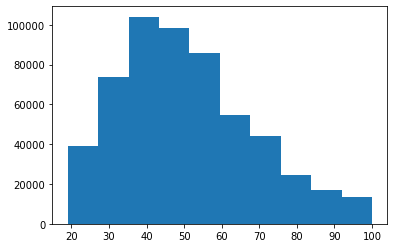

In [88]:
plt.hist(CCFD_data["age"]) #Histogram of age variable

From the above histogram we see that the maximum age lies between 40-60.

In [89]:
# low-side outliers percentage
low_outliers_count_age = CCFD_data[CCFD_data['age'] < 18].shape[0] #Here I have taken 18 as the minimum age to do the fraud transaction.
low_outliers_percentage_age = low_outliers_count_age / len(CCFD_data) * 100
f"{low_outliers_percentage_age:.2f}%"

#from the below result we can see that there are no lower edge outliers

'0.00%'

In [90]:
# high-side outliers percentage

low_outliers_count_age = CCFD_data[CCFD_data['age'] > 65].shape[0] #Here I have taken 18 as the minimum age to do the fraud transaction.
low_outliers_percentage_age = low_outliers_count_age / len(CCFD_data) * 100
f"{low_outliers_percentage_age:.2f}%"

#from the below result we can see that there are around 20% data are higher edge outliers


'19.88%'

In [91]:
# Appling Standalone imputation to remove 

CCFD_data['age_new'] = CCFD_data['age']
CCFD_data['age_new'][(CCFD_data['age'] > 65) | (CCFD_data['age'] < 18)] = round(CCFD_data['age'].mean())
CCFD_data['age_new']

CCFD_data['age_new'].value_counts()


<ipython-input-91-6e948026dc49>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CCFD_data['age_new'][(CCFD_data['age'] > 65) | (CCFD_data['age'] < 18)] = round(CCFD_data['age'].mean())


51    123840
52     19629
40     17210
37     16229
39     15992
50     14663
48     14063
38     13701
34     13428
46     13155
36     13012
49     12938
27     12927
31     12320
53     11629
44     11575
54     10996
35     10785
47     10710
41     10662
33     10622
58     10315
62      9882
57      9628
29      8872
42      8741
55      8625
30      8550
43      8475
25      8219
59      7916
45      7808
64      7498
63      7215
56      7193
60      6869
32      6701
65      6577
61      5821
26      5629
24      4174
20      3228
28      2690
23      2459
21      1683
19       857
22         7
Name: age_new, dtype: int64

In [92]:
# Checking whether any outliers present after the imputation or not
util_percentiles_age_NEW=CCFD_data['age_new'].quantile([0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.995,1.00])
util_percentiles_age_NEW

0.100    30.0
0.250    37.0
0.500    49.0
0.750    51.0
0.800    52.0
0.900    58.0
0.910    59.0
0.920    59.0
0.930    60.0
0.940    61.0
0.950    62.0
0.960    62.0
0.970    63.0
0.980    64.0
0.990    65.0
0.995    65.0
1.000    65.0
Name: age_new, dtype: float64

In [93]:
# As we have the new age column is there so dropping the old age column

CCFD_data = CCFD_data.drop(columns = ['age'])
CCFD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555718 entries, 0 to 555717
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gender         555718 non-null  int64  
 1   is_fraud       555718 non-null  int64  
 2   trans_hour     555718 non-null  int64  
 3   trans_day      555718 non-null  int64  
 4   trans_month    555718 non-null  int64  
 5   trans_year     555718 non-null  int64  
 6   displacement   555718 non-null  float64
 7   cc_num_freq    555718 non-null  int64  
 8   merchant_freq  555718 non-null  int64  
 9   category_freq  555718 non-null  int64  
 10  state_freq     555718 non-null  int64  
 11  job_freq       555718 non-null  int64  
 12  amt_new        555718 non-null  float64
 13  city_pop_new   555718 non-null  int64  
 14  age_new        555718 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 63.6 MB


In [94]:
# displacements

# Here "displacement" is a predictor variable.

util_percentiles_dis=CCFD_data['displacement'].quantile([0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.995,1.00])
util_percentiles_dis

0.100     39.33
0.250     62.09
0.500     87.78
0.750    107.47
0.800    111.11
0.900    122.60
0.910    124.17
0.920    125.85
0.930    127.63
0.940    129.56
0.950    131.73
0.960    134.17
0.970    137.00
0.980    140.39
0.990    144.71
0.995    147.81
1.000    155.47
Name: displacement, dtype: float64

I don't think there are any outliers for the displacement column, because there are no value cross the threshold points so all values are within the limit.

## **Model Development** 

In [96]:
CCFD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555718 entries, 0 to 555717
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gender         555718 non-null  int64  
 1   is_fraud       555718 non-null  int64  
 2   trans_hour     555718 non-null  int64  
 3   trans_day      555718 non-null  int64  
 4   trans_month    555718 non-null  int64  
 5   trans_year     555718 non-null  int64  
 6   displacement   555718 non-null  float64
 7   cc_num_freq    555718 non-null  int64  
 8   merchant_freq  555718 non-null  int64  
 9   category_freq  555718 non-null  int64  
 10  state_freq     555718 non-null  int64  
 11  job_freq       555718 non-null  int64  
 12  amt_new        555718 non-null  float64
 13  city_pop_new   555718 non-null  int64  
 14  age_new        555718 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 63.6 MB


In [97]:
CCFD_data.head()

,gender,is_fraud,trans_hour,trans_day,trans_month,trans_year,displacement,cc_num_freq,merchant_freq,category_freq,state_freq,job_freq,amt_new,city_pop_new,age_new
0,1,0,7,18,9,2020,78.68,872,1171,56357,5052,872,59.91,18182,49
1,1,0,17,5,12,2020,75.04,1058,987,49926,5242,2361,3.96,76383,39
2,0,0,11,15,6,2019,73.16,429,1147,56357,19895,842,51.17,16305,51
3,0,0,22,29,8,2020,53.32,1264,1006,49926,13392,2212,2.06,5161,31
4,1,0,15,25,7,2019,38.80,218,357,17439,40574,218,6.58,2435,51


**As stated in our problem statement, we want to investigate whether the transaction is fraudulent or not, which means this is a classification problem, so creating a linear regression model is not an option here. That's why, we must use a logistic regression model to obtain our specific result.**

In [98]:
#Let's keep out CCFD dataset safe here, so I am creating a copy of that dataset named as CCFD_model.
CCFD_model=CCFD_data.copy()
CCFD_model.head()

,gender,is_fraud,trans_hour,trans_day,trans_month,trans_year,displacement,cc_num_freq,merchant_freq,category_freq,state_freq,job_freq,amt_new,city_pop_new,age_new
0,1,0,7,18,9,2020,78.68,872,1171,56357,5052,872,59.91,18182,49
1,1,0,17,5,12,2020,75.04,1058,987,49926,5242,2361,3.96,76383,39
2,0,0,11,15,6,2019,73.16,429,1147,56357,19895,842,51.17,16305,51
3,0,0,22,29,8,2020,53.32,1264,1006,49926,13392,2212,2.06,5161,31
4,1,0,15,25,7,2019,38.80,218,357,17439,40574,218,6.58,2435,51


In [99]:
CCFD_model=CCFD_model[['gender','trans_hour','trans_day','trans_month','trans_year','displacement','cc_num_freq','merchant_freq','category_freq','state_freq','job_freq','amt_new','city_pop_new','age_new','is_fraud']]

In [100]:
## Separation of Independent and dependent features
X=CCFD_model.iloc[:,:-1] # It will take all the column accept the last column which is target variable
y=CCFD_model.iloc[:,-1]  # It will only take the last column as that is our target(dependent) variabale

# It is also possible to perform the model without separating the variables, but this will make the model easier to implement and run smoothly.

In [101]:
X.head()

,gender,trans_hour,trans_day,trans_month,trans_year,displacement,cc_num_freq,merchant_freq,category_freq,state_freq,job_freq,amt_new,city_pop_new,age_new
0,1,7,18,9,2020,78.68,872,1171,56357,5052,872,59.91,18182,49
1,1,17,5,12,2020,75.04,1058,987,49926,5242,2361,3.96,76383,39
2,0,11,15,6,2019,73.16,429,1147,56357,19895,842,51.17,16305,51
3,0,22,29,8,2020,53.32,1264,1006,49926,13392,2212,2.06,5161,31
4,1,15,25,7,2019,38.80,218,357,17439,40574,218,6.58,2435,51


In [102]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [103]:
from sklearn.model_selection import train_test_split  # Import the train_test_split function as I want to split my dataset into 2 parts.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Here I have divided the 20% of data as my test data and remaining 80% data as my train data.
# I have used random state 42 to maintain the consistancy of the random selection of test, train data.

**It's not necessary to split the data into 2 parts in the initial we can use the whole dataset as our trained dataset and later on we can select randomly some records (around 10% - 15% of data)from the "demo_data" dataset (which is created in the begining) as our test data.**

In [104]:
from sklearn.linear_model import LogisticRegression  #Importing the Logistic regression model from the sklearn library

In [105]:
classification=LogisticRegression()  
model_result=classification.fit(X_train,y_train)    # Here I have just fit the model by using the independent and dependent variabale

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [106]:
print("Intercept", model_result.intercept_) # Printing Intercept value
print("Coefficient", model_result.coef_)    # Printing coefficients value

Intercept [-1.55054361e-06]
Coefficient [[-9.71849450e-07  3.83426925e-05 -1.87054352e-05 -4.02504041e-05
  -3.13291446e-03 -1.44943838e-04 -2.25290563e-03  1.52010747e-04
   3.00988459e-05 -2.88011438e-06  3.78582090e-05  7.55613687e-03
  -5.71714796e-07 -8.92416046e-05]]


### Checking of Multicollinearity

****Basically, multicollinearity relates to determining whether or not there is a relationship between the independent variables themselves. Identifying a relationship between independent variables can hinder model creation, So we have to take some steps to handle these things.***

In [107]:
# Function to check is there any relation present or not
#Code for VIF Calculation
#Writing a function to calculate the VIF values

import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [108]:
vif_cal(input_data=CCFD_model, dependent_col= 'is_fraud')

gender  VIF =  1.05
trans_hour  VIF =  1.05
trans_day  VIF =  1.0
trans_month  VIF =  1.0
trans_year  VIF =  1.0
displacement  VIF =  1.0
cc_num_freq  VIF =  1.32
merchant_freq  VIF =  4.13
category_freq  VIF =  4.15
state_freq  VIF =  1.0
job_freq  VIF =  1.15
amt_new  VIF =  1.01
city_pop_new  VIF =  1.01
age_new  VIF =  1.13


To maintain the quality standard, we always check whether the VIF value for each variable is less than 5 or not. We noticed that all of the variables' VIF values are less than 5, thus we will take them all into account.

Here as per the calculation we don't need to drop any variable after calculating the VIF, that does not mean that the logictic regression model created above is perfect.

### Individual Impact of Variables

As multicollinearity is not available, this does not imply that all factors have a significant impact on model development; therefore, to determine the impact of the variables, we must verify the p-value.

In [109]:
import statsmodels.discrete.discrete_model as sm  # importing the logistics regression model from Statsmodel library
classification_impact=sm.Logit(y_train,X_train)    # Here I have just fit the model by using the independent and dependent variabale
classification_impact.fit()
classification_impact
# Note : By applying this method also we can build a model

Optimization terminated successfully.
         Current function value: 0.022786
         Iterations 10


In [110]:
classification_impact.fit().summary()

Optimization terminated successfully.
         Current function value: 0.022786
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               is_fraud   No. Observations:               444574
Model:                          Logit   Df Residuals:                   444560
Method:                           MLE   Df Model:                           13
Date:                Sun, 26 May 2024   Pseudo R-squ.:                  0.3092
Time:                        22:04:35   Log-Likelihood:                -10130.
converged:                       True   LL-Null:                       -14664.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
gender           -0.0177      0.047     -0.374      0.708      -0.110       0.075
trans_hour        0.0208      0.003      6.176      0.000       0.014       0.027
trans_day         0.0032      0.003      1.229      0.219      -0.002       0.008
trans_month      -0.0637      0.007     -9.396      0.000      -0.077      -0.050
trans_year       -0.0029      0.000    -28.179      0.000      -0.003      -0.003
displacement     -0.0009      0.001     -1.148      0.251      -0.002       0.001
cc_num_freq      -0.0023   8.46e-05    -27.429      0.000      -0.002      -0.002
merchant_freq     0.0002      0.000      0.958      0.338      -0.000       0.001
category_freq  3.267e-05   4.45e-06      7.341      0.000     2.4e-05    4.14e-05
state_freq    -3.079e-06   2.18e-06     -1.412      0.158   -7.35e-06    1.19e-06
job_freq       3.673e-05   2.81e-05      1.307      0.191   -1.83e-05    9.18e-05
amt_new           0.0075   8.11e-05     92.904      0.000       0.007       0.008
city_pop_new  -5.786e-07   1.81e-07     -3.196      0.001   -9.33e-07   -2.24e-07
age_new          -0.0062      0.002     -2.646      0.008      -0.011      -0.002
=================================================================================
"""

From the preceding computation, we can see that some variables have a negative impact on the model.  Gender, trans_day, Displacement,merchant_freq, state_freq, job_freq and city_pop_new variables have a minimal impact on the model. So to acquire the right model, we need to eliminate these useless variables, but we can't drop them all at once, so let's drop the gender variable now and fit the model again.

In [111]:
X_train.drop(columns='gender', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [112]:
X_train.head()

,trans_hour,trans_day,trans_month,trans_year,displacement,cc_num_freq,merchant_freq,category_freq,state_freq,job_freq,amt_new,city_pop_new,age_new
477892,13,13,4,2020,67.92,212,868,41886,12597,212,7.01,2435,32
28895,12,22,8,2020,75.18,876,727,36561,12864,2168,5.56,2290,51
503080,13,22,12,2020,137.07,1298,799,41886,11564,1298,9.70,2435,36
212453,9,29,5,2020,70.40,1299,1128,56357,5052,2595,47.27,2435,52
116226,21,29,4,2019,114.27,446,991,48179,19895,2058,22.36,2435,51


In [113]:
# Again we have to fit the model after dropping the 'gender' variable
classification_impact2=sm.Logit(y_train,X_train)    # Here I have just fit the model by using the independent and dependent variabale
classification_impact2.fit()
classification_impact2

Optimization terminated successfully.
         Current function value: 0.022786
         Iterations 10


In [114]:
classification_impact2.fit().summary()

Optimization terminated successfully.
         Current function value: 0.022786
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               is_fraud   No. Observations:               444574
Model:                          Logit   Df Residuals:                   444561
Method:                           MLE   Df Model:                           12
Date:                Sun, 26 May 2024   Pseudo R-squ.:                  0.3092
Time:                        22:04:41   Log-Likelihood:                -10130.
converged:                       True   LL-Null:                       -14664.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
trans_hour        0.0208      0.003      6.171      0.000       0.014       0.027
trans_day         0.0032      0.003      1.229      0.219      -0.002       0.008
trans_month      -0.0636      0.007     -9.394      0.000      -0.077      -0.050
trans_year       -0.0030      0.000    -28.864      0.000      -0.003      -0.003
displacement     -0.0009      0.001     -1.149      0.251      -0.002       0.001
cc_num_freq      -0.0023    8.4e-05    -27.576      0.000      -0.002      -0.002
merchant_freq     0.0002      0.000      0.961      0.336      -0.000       0.001
category_freq  3.276e-05   4.44e-06      7.369      0.000     2.4e-05    4.15e-05
state_freq    -3.053e-06   2.18e-06     -1.401      0.161   -7.32e-06    1.22e-06
job_freq       3.691e-05   2.81e-05      1.314      0.189   -1.81e-05     9.2e-05
amt_new           0.0075    8.1e-05     93.016      0.000       0.007       0.008
city_pop_new  -5.779e-07   1.81e-07     -3.193      0.001   -9.33e-07   -2.23e-07
age_new          -0.0062      0.002     -2.647      0.008      -0.011      -0.002
=================================================================================
"""

Again we see that the same varibles (trans_day, Displacement,merchant_freq, state_freq, job_freq and city_pop_new ) are not that much impactfull for the model building, s let's drop it one by one according to their heightest p-value and fit the model .

In [115]:
X_train.drop(columns=['merchant_freq'], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [116]:
X_train.head()

,trans_hour,trans_day,trans_month,trans_year,displacement,cc_num_freq,category_freq,state_freq,job_freq,amt_new,city_pop_new,age_new
477892,13,13,4,2020,67.92,212,41886,12597,212,7.01,2435,32
28895,12,22,8,2020,75.18,876,36561,12864,2168,5.56,2290,51
503080,13,22,12,2020,137.07,1298,41886,11564,1298,9.70,2435,36
212453,9,29,5,2020,70.40,1299,56357,5052,2595,47.27,2435,52
116226,21,29,4,2019,114.27,446,48179,19895,2058,22.36,2435,51


In [117]:
# Again we have to fit the model after dropping the 'merchant_freq' variable
classification_impact3=sm.Logit(y_train,X_train)    # Here I have just fit the model by using the independent and dependent variabale
classification_impact3.fit()
classification_impact3

Optimization terminated successfully.
         Current function value: 0.022787
         Iterations 10


In [118]:
classification_impact3.fit().summary()

Optimization terminated successfully.
         Current function value: 0.022787
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               is_fraud   No. Observations:               444574
Model:                          Logit   Df Residuals:                   444562
Method:                           MLE   Df Model:                           11
Date:                Sun, 26 May 2024   Pseudo R-squ.:                  0.3092
Time:                        22:04:47   Log-Likelihood:                -10131.
converged:                       True   LL-Null:                       -14664.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
trans_hour        0.0207      0.003      6.159      0.000       0.014       0.027
trans_day         0.0033      0.003      1.237      0.216      -0.002       0.008
trans_month      -0.0636      0.007     -9.384      0.000      -0.077      -0.050
trans_year       -0.0029      0.000    -28.859      0.000      -0.003      -0.003
displacement     -0.0009      0.001     -1.154      0.249      -0.002       0.001
cc_num_freq      -0.0023    8.4e-05    -27.578      0.000      -0.002      -0.002
category_freq  3.628e-05   2.53e-06     14.331      0.000    3.13e-05    4.12e-05
state_freq     -3.05e-06   2.18e-06     -1.400      0.162   -7.32e-06    1.22e-06
job_freq       3.675e-05   2.81e-05      1.308      0.191   -1.83e-05    9.18e-05
amt_new           0.0075    8.1e-05     93.122      0.000       0.007       0.008
city_pop_new  -5.764e-07   1.81e-07     -3.185      0.001   -9.31e-07   -2.22e-07
age_new          -0.0062      0.002     -2.645      0.008      -0.011      -0.002
=================================================================================
"""

In [119]:
# Let's drop displacement
X_train.drop(columns=['displacement'], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [120]:
# Again we have to fit the model after dropping the 'displacement' variable and fit the model
classification_impact4=sm.Logit(y_train,X_train)   
classification_impact4.fit()
classification_impact4
classification_impact4.fit().summary()

Optimization terminated successfully.
         Current function value: 0.022789
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.022789
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               is_fraud   No. Observations:               444574
Model:                          Logit   Df Residuals:                   444563
Method:                           MLE   Df Model:                           10
Date:                Sun, 26 May 2024   Pseudo R-squ.:                  0.3091
Time:                        22:04:53   Log-Likelihood:                -10131.
converged:                       True   LL-Null:                       -14664.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
trans_hour        0.0207      0.003      6.161      0.000       0.014       0.027
trans_day         0.0033      0.003      1.244      0.214      -0.002       0.008
trans_month      -0.0636      0.007     -9.384      0.000      -0.077      -0.050
trans_year       -0.0030   9.75e-05    -30.623      0.000      -0.003      -0.003
cc_num_freq      -0.0023    8.4e-05    -27.574      0.000      -0.002      -0.002
category_freq  3.625e-05   2.53e-06     14.321      0.000    3.13e-05    4.12e-05
state_freq    -3.051e-06   2.18e-06     -1.400      0.161   -7.32e-06    1.22e-06
job_freq       3.715e-05   2.81e-05      1.323      0.186   -1.79e-05    9.22e-05
amt_new           0.0075   8.09e-05     93.131      0.000       0.007       0.008
city_pop_new  -5.751e-07   1.81e-07     -3.179      0.001    -9.3e-07   -2.21e-07
age_new          -0.0061      0.002     -2.643      0.008      -0.011      -0.002
=================================================================================
"""

In [121]:
# Let's drop trans_day
X_train.drop(columns=['trans_day'], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [122]:
# Again we have to fit the model after dropping the 'trans_day' variable and fit the model
classification_impact5=sm.Logit(y_train,X_train)   
classification_impact5.fit()
classification_impact5
classification_impact5.fit().summary()

Optimization terminated successfully.
         Current function value: 0.022791
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.022791
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               is_fraud   No. Observations:               444574
Model:                          Logit   Df Residuals:                   444564
Method:                           MLE   Df Model:                            9
Date:                Sun, 26 May 2024   Pseudo R-squ.:                  0.3091
Time:                        22:04:59   Log-Likelihood:                -10132.
converged:                       True   LL-Null:                       -14664.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
trans_hour        0.0207      0.003      6.169      0.000       0.014       0.027
trans_month      -0.0635      0.007     -9.368      0.000      -0.077      -0.050
trans_year       -0.0030   9.54e-05    -31.031      0.000      -0.003      -0.003
cc_num_freq      -0.0023    8.4e-05    -27.575      0.000      -0.002      -0.002
category_freq  3.625e-05   2.53e-06     14.320      0.000    3.13e-05    4.12e-05
state_freq    -3.047e-06   2.18e-06     -1.398      0.162   -7.32e-06    1.22e-06
job_freq        3.73e-05   2.81e-05      1.328      0.184   -1.77e-05    9.23e-05
amt_new           0.0075   8.09e-05     93.136      0.000       0.007       0.008
city_pop_new  -5.765e-07   1.81e-07     -3.186      0.001   -9.31e-07   -2.22e-07
age_new          -0.0061      0.002     -2.631      0.009      -0.011      -0.002
=================================================================================
"""

In [123]:
# Let's drop state_freq and job_freq togather
X_train.drop(columns=['state_freq','job_freq'], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [124]:
# Again we have to fit the model after dropping the 'state_freq and job_freq togather and fit the model
classification_impact6=sm.Logit(y_train,X_train)   
classification_impact6.fit()
classification_impact6
classification_impact6.fit().summary()

Optimization terminated successfully.
         Current function value: 0.022795
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.022795
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               is_fraud   No. Observations:               444574
Model:                          Logit   Df Residuals:                   444566
Method:                           MLE   Df Model:                            7
Date:                Sun, 26 May 2024   Pseudo R-squ.:                  0.3089
Time:                        22:05:05   Log-Likelihood:                -10134.
converged:                       True   LL-Null:                       -14664.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
trans_hour        0.0207      0.003      6.173      0.000       0.014       0.027
trans_month      -0.0634      0.007     -9.361      0.000      -0.077      -0.050
trans_year       -0.0030   9.33e-05    -31.836      0.000      -0.003      -0.003
cc_num_freq      -0.0023   7.96e-05    -28.701      0.000      -0.002      -0.002
category_freq  3.621e-05   2.53e-06     14.311      0.000    3.13e-05    4.12e-05
amt_new           0.0075   8.09e-05     93.147      0.000       0.007       0.008
city_pop_new  -5.643e-07   1.81e-07     -3.124      0.002   -9.18e-07    -2.1e-07
age_new          -0.0060      0.002     -2.587      0.010      -0.011      -0.001
=================================================================================
"""

From the above sumary report we can see that every variables are impactfull for the model building so we can keep all these variables into the account. 

**From the above result we can find that some of the columns are not useful for the model development so let's eliminate those variable and create anothe datasets from the existing one.**

In [125]:
CCFD_model_2=CCFD_data[['trans_hour','trans_month','trans_year','cc_num_freq','category_freq','amt_new','city_pop_new','age_new','is_fraud']]
CCFD_model_2.head()  #creating the another datasets named as CCFD_model_2

,trans_hour,trans_month,trans_year,cc_num_freq,category_freq,amt_new,city_pop_new,age_new,is_fraud
0,7,9,2020,872,56357,59.91,18182,49,0
1,17,12,2020,1058,49926,3.96,76383,39,0
2,11,6,2019,429,56357,51.17,16305,51,0
3,22,8,2020,1264,49926,2.06,5161,31,0
4,15,7,2019,218,17439,6.58,2435,51,0


In [126]:
## Again Separation of Independent and dependent features
X_new=CCFD_model_2.iloc[:,:-1] 
y_new=CCFD_model_2.iloc[:,-1] 

In [127]:
# Again split the datasets into two different parts
from sklearn.model_selection import train_test_split 
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.20, random_state=42)


In [128]:
# Creating the final model
classification_new=LogisticRegression()  
model_result_new=classification_new.fit(X_train_new,y_train_new)    # Here I have just fit the model by using the independent and dependent variabale

In [129]:
print("Intercept", model_result_new.intercept_) # Printing Intercept value for new model
print("Coefficient", model_result_new.coef_)    # Printing coefficients value for the new model

Intercept [-1.55483338e-06]
Coefficient [[ 3.47440807e-05 -3.73756080e-05 -3.14140221e-03 -2.22021873e-03
   3.30063818e-05  7.55787459e-03 -5.57458898e-07 -8.63378188e-05]]


### Predictive value calculation

In order to calculate the predictive value, we must use the new model and new X_test and y_test data.

In [130]:
y_pred=classification_new.predict(X_test_new)  # Classification_new is our model name

In [131]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Confusion Metrics, Accuracy

A confusion matrix is a tool in machine learning used to evaluate a classification model's performance. It breaks down the model's predictions into four categories: true positives, true negatives, false positives, and false negatives. This helps us to understand where the model is performing well and where it's making mistakes.

In machine learning, accuracy refers to the percentage of predictions a classification model makes correctly. It's simply the number of correct guesses divided by the total number of predictions.

In [132]:
# Importing confusion matrix and accuracy function from sklearn library.

from sklearn.metrics import confusion_matrix,accuracy_score   

In [133]:
print(confusion_matrix(y_test_new,y_pred))

[[110493     63]
 [   484    104]]


This confusion matrix shows the performance of a classification model on a binary classification task. The rows represent the actual classes, and the columns represent the predicted classes.

* 110,493 were correctly classified as positive cases (True Positives).
* 104 were correctly classified as negative cases (True Negatives).
* 63 were incorrectly classified as positive cases (False Positives). These are Type I errors, where the model predicts positive when it's actually negative.
* 484 were incorrectly classified as negative cases (False Negatives). These are Type II errors, where the model predicts negative when it's actually positive.

In [134]:
print(accuracy_score(y_test_new,y_pred))

0.9950784567767941


That's a very good accuracy. With an accuracy of 99.5%, our model rpresent that all values are correctly classified all of the cases.  In other words, the model only made mistakes on a very small percentage of the cases.

## Decision tree

A decision tree is a non-parametric supervised learning algorithm used for both classification and regression tasks. In summary, decision trees provide an easy-to-understand representation of decision-making, making them valuable for various applications.

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
from sklearn.tree import DecisionTreeClassifier  # import the Decision tree form the sklearn library

In [140]:
DT_classifier=DecisionTreeClassifier(criterion='entropy') # Here we taken entropy for examine the purity and impurity split check we can also use Gini impurity.
# set the model


In [141]:
DT_classifier.fit(X_train_new, y_train_new)  # Fit the model

DecisionTreeClassifier(criterion='entropy')

[Text(526.7557756086605, 749.14875, 'X[5] <= 258.36\nentropy = 0.048\nsamples = 444574\nvalue = [442224, 2350]'),
 Text(244.14535669815484, 725.3662499999999, 'X[0] <= 21.5\nentropy = 0.022\nsamples = 433542\nvalue = [432637, 905]'),
 Text(100.30300363567586, 701.58375, 'X[0] <= 3.5\nentropy = 0.012\nsamples = 389319\nvalue = [388907, 412]'),
 Text(45.25541358439812, 677.80125, 'X[5] <= 24.845\nentropy = 0.044\nsamples = 56875\nvalue = [56601, 274]'),
 Text(28.669266980497646, 654.01875, 'X[4] <= 54601.0\nentropy = 0.122\nsamples = 13776\nvalue = [13546, 230]'),
 Text(18.312306657700066, 630.2362499999999, 'X[4] <= 23309.0\nentropy = 0.034\nsamples = 13587\nvalue = [13539, 48]'),
 Text(10.807262945527908, 606.4537499999999, 'X[5] <= 16.09\nentropy = 0.429\nsamples = 433\nvalue = [395, 38]'),
 Text(6.004034969737727, 582.67125, 'X[7] <= 37.5\nentropy = 0.795\nsamples = 154\nvalue = [117, 37]'),
 Text(2.401613987895091, 558.88875, 'X[6] <= 19172.5\nentropy = 0.184\nsamples = 107\nvalue =

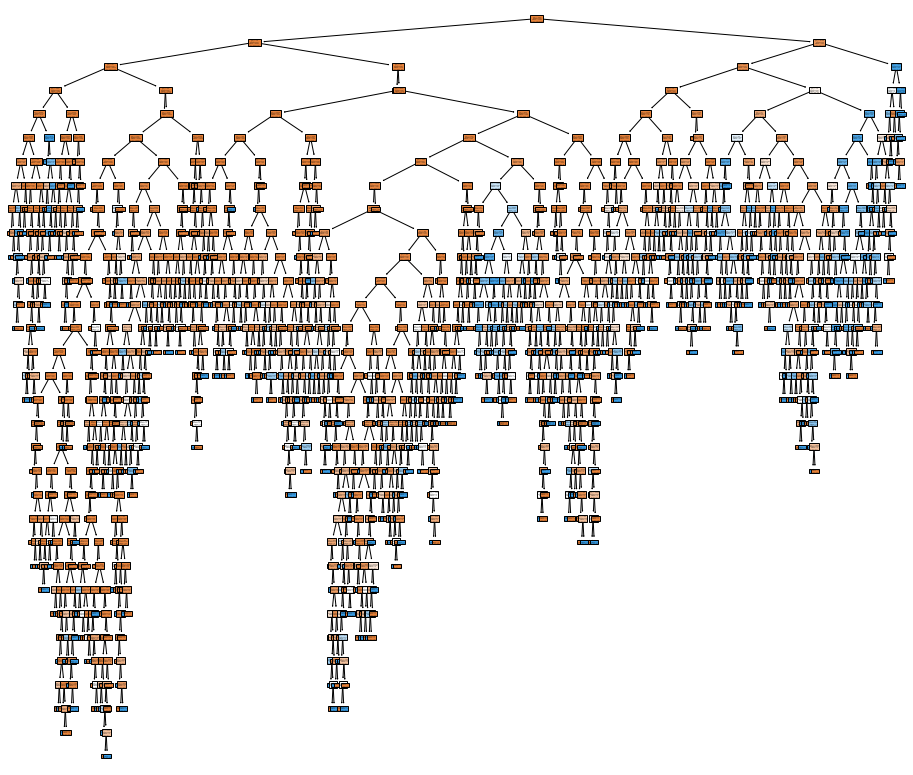

In [145]:
# The below code will draw the Dicision tree
from sklearn import tree   
plt.figure(figsize=(16,14))
tree.plot_tree(DT_classifier,filled=True)

In [146]:
##prediction under Decision Tree
y_pred_DT=DT_classifier.predict(X_test_new)

In [147]:
y_pred_DT

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [148]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred_DT,y_test_new)
print(score)
print(classification_report(y_pred_DT,y_test_new))

0.9975617217303678
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110569
           1       0.76      0.78      0.77       575

    accuracy                           1.00    111144
   macro avg       0.88      0.89      0.88    111144
weighted avg       1.00      1.00      1.00    111144



Under the decision tree classifier model we can see that accuracy score is 99.75% 